## Обработка пропусков в данных, кодирование категориальных признаков, масштабирование данных.

## 1)Задание

1. Выбрать набор данных (датасет), содержащий категориальные признаки и пропуски в данных. Для выполнения следующих пунктов можно использовать несколько различных наборов данных (один для обработки пропусков, другой для категориальных признаков и т.д.
2. Для выбранного датасета (датасетов) на основе материалов лекции решить следующие задачи: 
    * обработку пропусков в данных; 
    * кодирование категориальных признаков;
    * масштабирование данных.


Импорт библиотек

In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.impute
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler, OneHotEncoder
%matplotlib inline 
sns.set(style="ticks")

Загрузка датасета и первичный анализ

In [9]:
data = pd.read_csv("games.csv")

In [4]:
data.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
data.dtypes

Name                object
Platform            object
Year_of_Release    float64
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Global_Sales       float64
Critic_Score       float64
Critic_Count       float64
User_Score          object
User_Count         float64
Developer           object
Rating              object
dtype: object

In [6]:
data.shape

(16719, 16)

## 2)Обработка пропусков

Найдем количество пропусков

In [9]:
data.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

Построим график распределения оценок критиков

<AxesSubplot:xlabel='Critic_Score', ylabel='Density'>

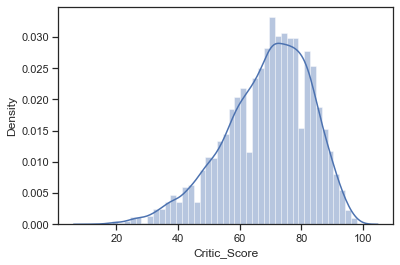

In [10]:
sns.distplot(data['Critic_Score'])

In [ ]:
Теперь построим график оценок критиков, где пропски заполним значением 0

<AxesSubplot:xlabel='Critic_Score', ylabel='Density'>

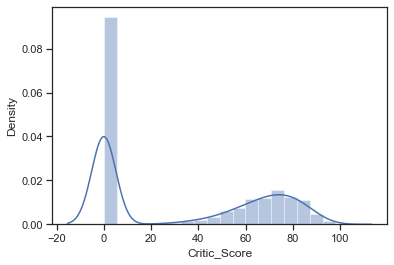

In [11]:
sns.distplot(data["Critic_Score"].fillna(0))

Построим график без учёта пропусков

<AxesSubplot:xlabel='Critic_Score', ylabel='Density'>

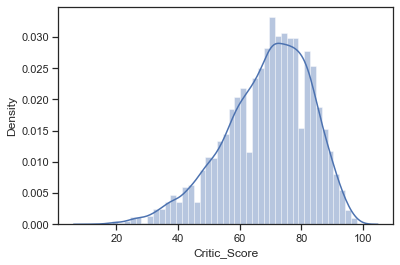

In [13]:
sns.distplot(data["Critic_Score"].dropna())

Построим график заполнив пропуски среднестатистическим значением

<AxesSubplot:xlabel='Critic_Score', ylabel='Density'>

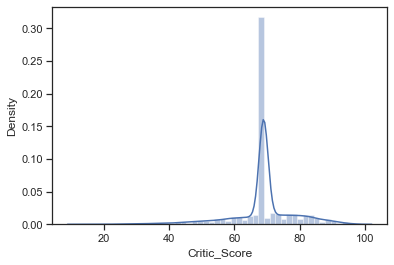

In [14]:
sns.distplot(data["Critic_Score"].fillna(data["Critic_Score"].mean()))

Построим график заполнив пропуски значением медианы

<AxesSubplot:ylabel='Density'>

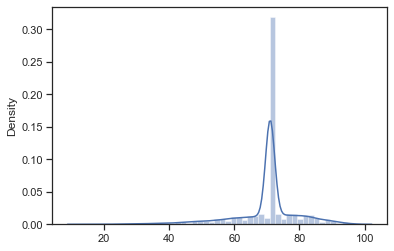

In [17]:
mediana = sklearn.impute.SimpleImputer(strategy="median")
median_rating = mediana.fit_transform(data[["Critic_Score"]])
sns.distplot(median_rating)

Построим график заполнив пропуски значением 70.0

<AxesSubplot:xlabel='Critic_Score', ylabel='Density'>

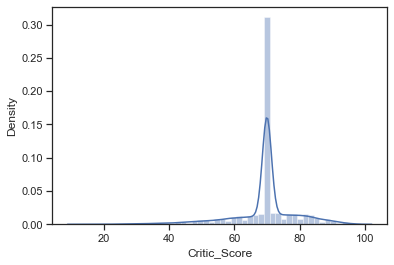

In [18]:
sns.distplot(data["Critic_Score"].fillna(70.0))

In [19]:
data["Critic_Score"] = median_rating
data["Critic_Score"].isnull().sum()

0

Столбец Critic_Score не имеет пропусков данных

## 2)Кодирование категориальных признаков

### Кодирование категорий целочисленными значениями

In [20]:
categories = data["Genre"].dropna().astype(str)
categories.value_counts()

Action          3370
Sports          2348
Misc            1750
Role-Playing    1500
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       874
Fighting         849
Strategy         683
Puzzle           580
Name: Genre, dtype: int64

In [21]:
le = LabelEncoder()
category_le = le.fit_transform(categories)
print(np.unique(category_le))
le.inverse_transform(np.unique(category_le))

[ 0  1  2  3  4  5  6  7  8  9 10 11]


array(['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
       'Strategy'], dtype=object)

In [26]:
data.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,71.0,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,71.0,NaN,NaN,NaN,NaN,NaN


### Кодирование категорий наборами бинарных значений

In [35]:
df=pd.DataFrame(data['Platform'])
df.dropna(how='any', inplace=True)
df

,Platform
0,Wii
1,NES
2,Wii
3,Wii
4,GB
...,...
16714,PS3
16715,X360
16716,PSV
16717,GBA


In [36]:
ohe = OneHotEncoder()
df_ohe = ohe.fit_transform(df[['Platform']])

In [37]:
df_ohe

<16719x31 sparse matrix of type '<class 'numpy.float64'>'
	with 16719 stored elements in Compressed Sparse Row format>

In [39]:
df_ohe.todense()[0:5]

matrix([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

## 3)Масштабирование данных

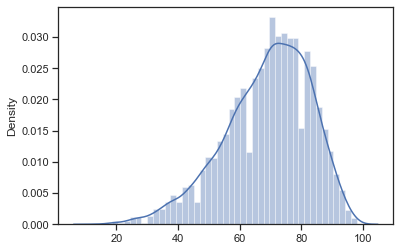

In [31]:
sns.distplot(data[["Critic_Score"]]);

### MinMax масштабирование

<AxesSubplot:ylabel='Density'>

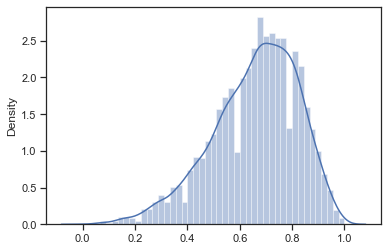

In [32]:
mm = MinMaxScaler()
sns.distplot(mm.fit_transform(data[["Critic_Score"]]))

### Масштабирование данных на основе Z-оценки

<AxesSubplot:ylabel='Density'>

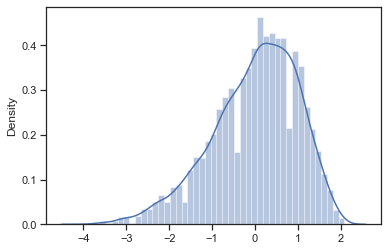

In [33]:
ss = StandardScaler()
sns.distplot(ss.fit_transform(data[["Critic_Score"]]))